In [1]:
from qiskit import * ### Importing the library to our notebook
from qiskit_aer import AerSimulator
from qiskit_aer import AerProvider
from qiskit.visualization import plot_histogram
%matplotlib inline

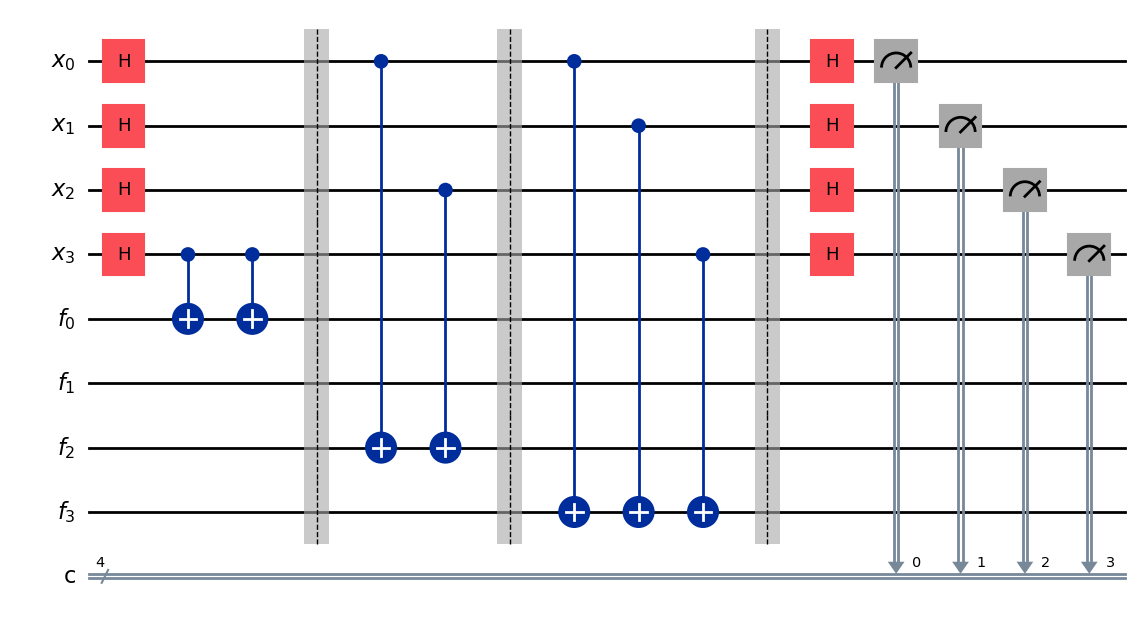

In [2]:
q1 = QuantumRegister(4, 'x') 
q2 = QuantumRegister(4, 'f') 
c = ClassicalRegister(4, 'c') 
qc_sim=QuantumCircuit(q1,q2,c)
qc_sim.h(q1) ### Initialization
### Quantum oracle of f(x_0,x_1,x_2)=x_2, 1\xor x_0\xor x_1, 1\xor x_2 
### f1
qc_sim.cx(q1[3],q2[0])
qc_sim.cx(q1[3],q2[0])
qc_sim.barrier()
### f2
### f3
qc_sim.cx(q1[0],q2[2])
qc_sim.cx(q1[2],q2[2])
qc_sim.barrier()
##f4
qc_sim.cx(q1[0],q2[3])
qc_sim.cx(q1[1],q2[3])
qc_sim.cx(q1[3],q2[3])
qc_sim.barrier()
### Oracle ends
qc_sim.h(q1)
### Measurement
qc_sim.measure(q1,c) 
qc_sim.draw(output='mpl')

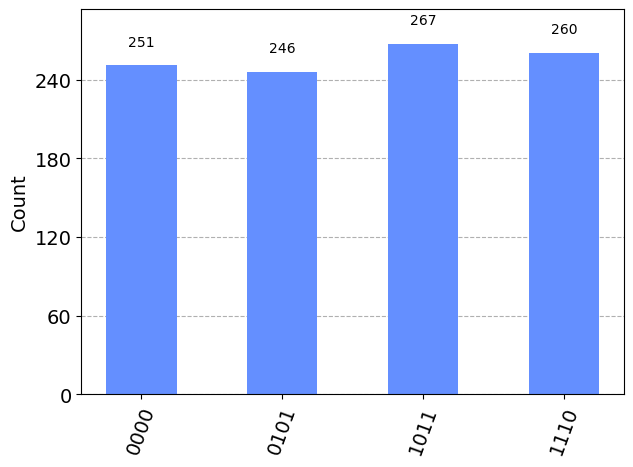

In [3]:
prov = AerProvider()
simulator = prov.get_backend('qasm_simulator')
result = simulator.run(qc_sim).result()
counts = result.get_counts(qc_sim)
plot_histogram(result.get_counts(qc_sim))

In [6]:
# Extract values with counts > 0
valid_values = [int(key, 2) for key in counts.keys() if counts[key] > 0]

# Xor each value with the others and convert to binary
xored_values_binary = []
for i in range(len(valid_values)):
    for j in range(i + 1, len(valid_values)):
        xor_result = valid_values[i] ^ valid_values[j]
        xored_values_binary.append(bin(xor_result)[2:].zfill(4))

# Print the XOR-ed values in binary format
print("All the shifts along with the hidden shifts are:")
for value in xored_values_binary:
    print(value)

All the shifts along with the hidden shifts are:
0101
1110
1011
1011
1110
0101
